<a href="https://colab.research.google.com/github/Archandra12/capstone_1/blob/master/Missing_Values_Treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What to look for Missing values in data set and what to do for them?

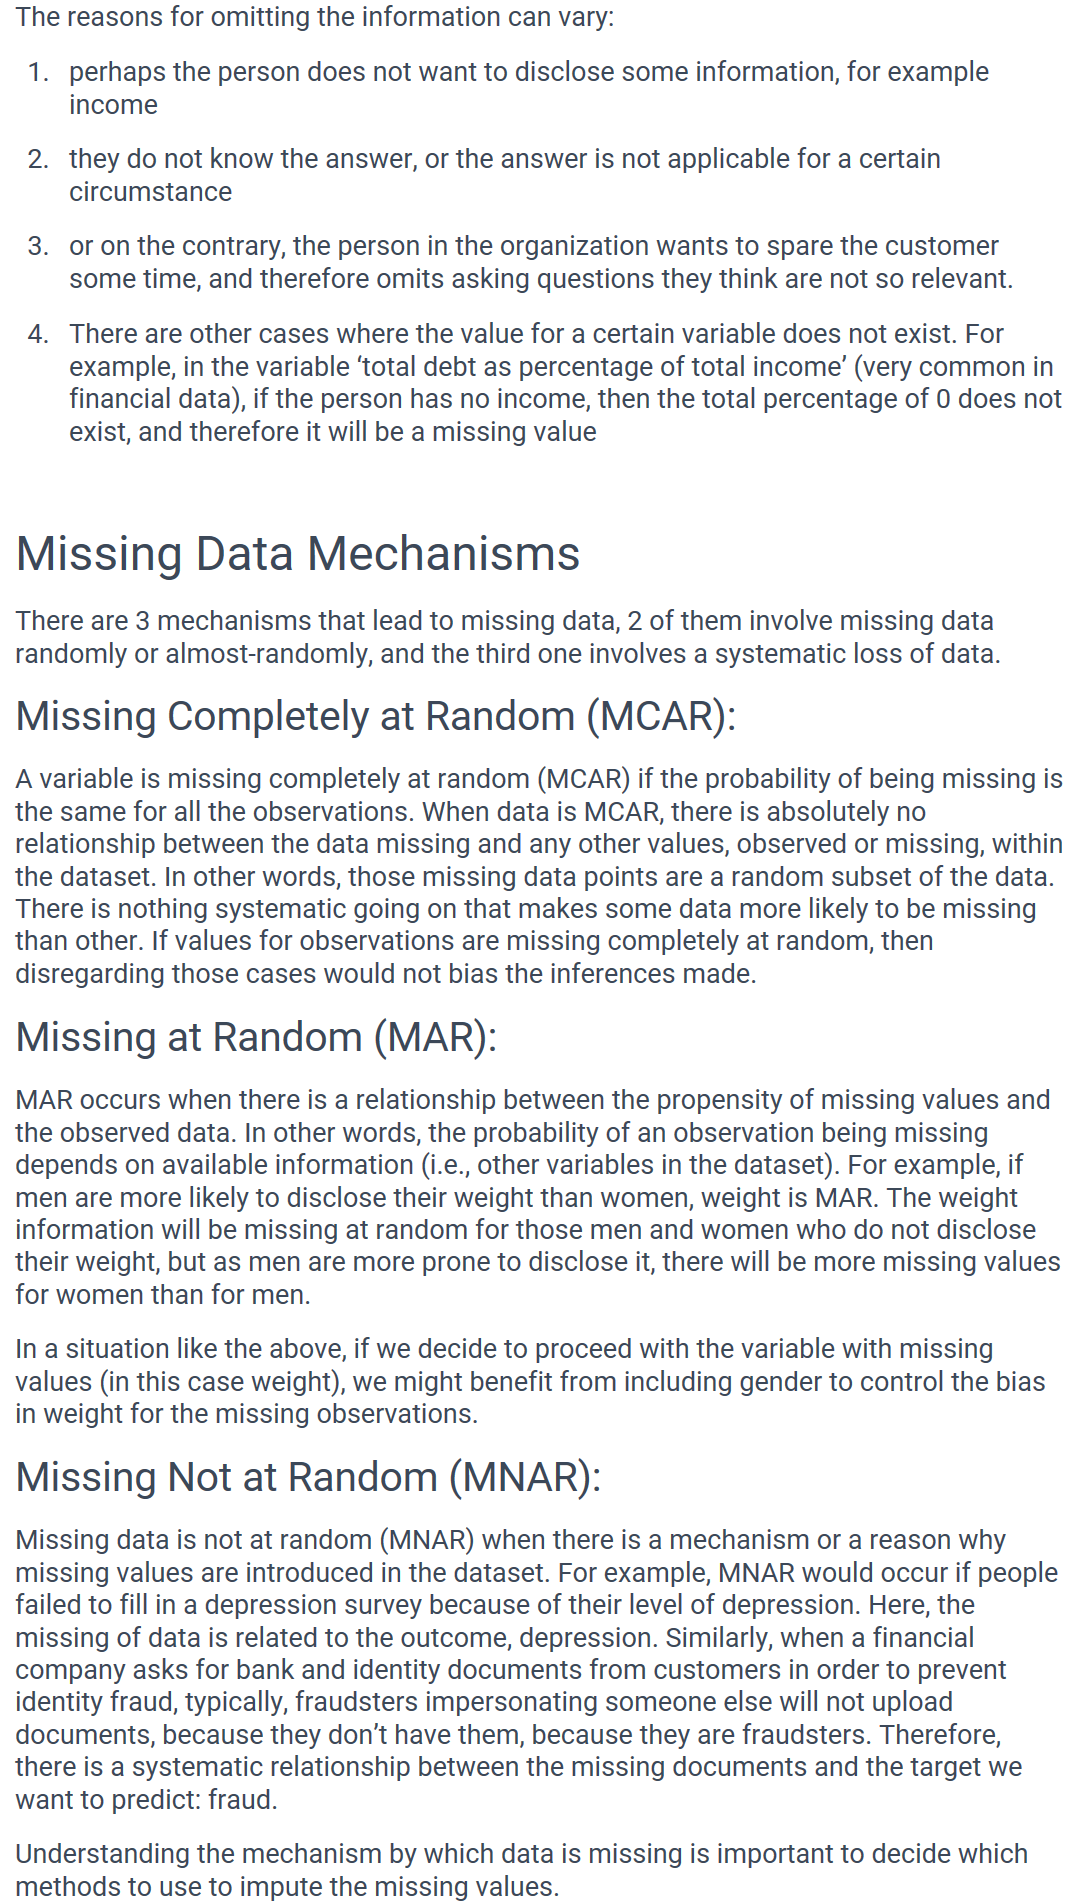

Let's begin with some examples

In [1]:
import pandas as pd
import numpy as np

# to display the total number of columns present in the dataset
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see Cabin column has some missing values. Python shows Nan for missing values.

In [11]:
#Let's check the count of null values in the columns
print("Count of nulls:\n\n ", data.isnull().sum())
print("% of nulls:\n\n ", data.isnull().mean())

Count of nulls:

  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
% of nulls:

  PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


MNAR - Missing Data Not at Random - Systematic mising values

We can see column Cabin has 77% missing values. Let's study the reason of missing values. 

In [14]:
data['Cabin'].isnull().groupby(data['Survived']).mean()

Survived
0    0.876138
1    0.602339
Name: Cabin, dtype: float64

Cabin has null vlues for 87% who did not survive as compared to 60% who have survived. It seems to be Missing due to died people's detail was not that important and may have not been maintained. Looks very much like missing due to reason not at random. 

##Note: 
Having said this, to truly underpin whether the data is missing not at random, we would need to get extremely familiar with the way data was collected. Analysing datasets can only show us the right direction or help us build assumptions.

##Let's study missing values in Age column

In [27]:
data['Age_null'] = np.where(data['Age'].isnull(),1,0) #Let create a column in dataframe to store 1 for each null value of Age and 0 otherwise


In [28]:
data.groupby('Survived')['Age_null'].mean()

Survived
0    0.227687
1    0.152047
Name: Age_null, dtype: float64

In [30]:
data['Age'].isnull().groupby(data['Survived']).mean()

Survived
0    0.227687
1    0.152047
Name: Age, dtype: float64

Again, we observe a higher number of missing data for the people who did not survive the tragedy. The analysis therefore suggests that there is a systematic loss of data: people who did not survive tend to have more missing information. Presumably, the method chosen to gather the information, contributes to the generation of these missing data.

##Missing data Completely At Random (MCAR)

When we say data are missing completely at random, we mean that the missingness is nothing to do with the person being studied. For example, a questionnaire might be lost in the post, or a blood sample might be damaged in the lab. In CADET, sex might be MCAR. Of course, this is not truly random, but means that whether something is missing is not related to the subject of the missing data.

In the dataset the variable Embarked also contains missing values. We will slice the dataframe data to show only the rows where Embarked has value NaN.

In [31]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_null
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


Two rows show missed out values in Embarked column seems completely at Random as we can't make any reason based on any other columns for these missed values. 

##Missing data at Random (MAR)

means there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data.

Whether an observation is missing has nothing to do with the missing values, but it does have to do with the values of an individual’s observed variables. So, for example, if men are more likely to tell you their weight than women, weight is MAR.

Let's check an example. We will take toy data for loans and see How Employement and Employement Duration columns showcase concept of MAR

In [32]:
data = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/feature-engineering-for-machine-learning-dataset/master/loan.csv', usecols=['employment', 'time_employed'])
data.head()

,employment,time_employed
0,Teacher,<=5 years
1,Accountant,<=5 years
2,Statistician,<=5 years
3,Other,<=5 years
4,Bus driver,>5 years


In [34]:
data.isnull().sum()

employment       611
time_employed    529
dtype: int64

We can see Missing values for Employment and time_employed. There are more missing values in time_employed as compared to employment.

In [37]:
print("No of Employment Categories: ", len(data.employment.unique()))
print(data.employment.unique())

print("\n\nNo of Employment Categories: ", len(data.time_employed.unique()))
print(data.time_employed.unique())


No of Employment Categories:  12
['Teacher' 'Accountant' 'Statistician' 'Other' 'Bus driver' 'Secretary'
 'Software developer' 'Nurse' 'Taxi driver' nan 'Civil Servant' 'Dentist']


No of Employment Categories:  3
['<=5 years' '>5 years' nan]


Let's Check data for which employment has a value but time_employed has missing

In [41]:
data[~data['employment'].isnull()]['time_employed'].isnull().mean()

0.0005325380764724678

Simillarly, we will calculate the proportion of missing data for the time_employed variable for customers who have not declared employment.

In [43]:
data[data['employment'].isnull()]['time_employed'].isnull().mean()

0.8576104746317512

The number of borrowers who have reported occupation and have missing values in time_employed is minimal. Whereas the customers who did not report an occupation or employment, are mostly reporting missing values in the time_employed variable

This further supports that the missing values in employment are related to the missing values in time_employed.

Thus proves that its an example of MAR

##Why you need to know the mechanism you have
Multiple imputation and Maximum Likelihood assume the data are at least missing at random. So the important distinction here is whether the data are MAR as opposed to MNAR.

Listwise deletion, however, requires the data are MCAR in order to not introduce bias in the results.

As long as the distribution and percentage of missing data is no so great that it negatively affects power, listwise deletion can be a good choice for MCAR missing data. So the important distinction here is whether the data are MCAR as opposed to MAR.

Keep in mind that in most data sets, more than one variable will have missing data, and they may not all have the same mechanism. It’s worthwhile diagnosing the mechanism for each variable with missing data before choosing an approach.

I use the term diagnosing rather than testing, because you’re not going to get a straight answer without knowing the values of the missing data. Of course, if you knew those, you wouldn’t be doing any of this.

It’s like checking for multicollinearity or testing assumptions. Each piece of information tells you something, but there is no definitive answer.

You have to get at the mechanism in a number of ways and then decide if making the assumption about the mechanism is reasonable.

Diagnosing the Mechanism
1. MAR vs. MNAR

The only true way to distinguish between MNAR and MAR is to measure some of that missing data. It’s a common practice among professional surveyors to, for example, follow-up on a paper survey with phone calls to a group of the non-respondents and ask a few key survey items. This allows you to compare respondents to non-respondents.

If their responses on those key items differ by very much, that’s good evidence that the data are MNAR.

However in most missing data situations, we don’t have the luxury of getting a hold of the missing data. So while we can’t test it directly, we can examine patterns in the data get an idea of what’s the most likely mechanism.

The first thing in diagnosing randomness of the missing data is to use your substantive scientific knowledge of the data and your field. The more sensitive the issue, the less likely people are to tell you. They’re not going to tell you as much about their cocaine usage as they are about their phone usage.

Likewise, many fields have common research situations in which non-ignorable data is common. Educate yourself in your field’s literature.

2. MCAR vs. MAR

There is a very useful test for MCAR, Little’s test. But like all tests of assumptions, it’s not definitive. So run it, but use it as only one piece of information.

A second technique is to create dummy variables for whether a variable is missing.

1 = missing
0 = observed

You can then run t-tests and chi-square tests between this variable and other variables in the data set to see if the missingness on this variable is related to the values of other variables.

For example, if women really are less likely to tell you their weight than men, a chi-square test will tell you that the percentage of missing data on the weight variable is higher for women than men.

The SPSS Missing Data module has a very nice procedure for doing this automatically–you don’t have to create all those dummy variables. I don’t know of other software packages having this built in, but it’s not hard to program.